# **Data Visualization:**

*  Basic 2D
*  Interactive Map
*  Interactive Dashboard

### **Loading Data + Data cleaning & Filtering**

In [ ]:
import pandas as pd
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

#Cleaning the data
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
#renaming columns
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
#display(df_can.head(10))
#add column total for each row
df_can['Total'] = df_can.sum(axis=1)
display(df_can.head(10))

<ipython-input-23-2ea61ecddd23>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15
5,Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,...,295,184,106,76,62,61,39,70,45,2113
6,Antigua and Barbuda,Latin America and the Caribbean,Caribbean,Developing regions,0,0,0,0,42,52,...,24,32,15,32,38,27,37,51,25,981
7,Argentina,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,...,1153,847,620,540,467,459,278,263,282,19596
8,Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
9,Australia,Oceania,Australia and New Zealand,Developed regions,702,639,484,317,317,319,...,909,875,1033,1018,1018,933,851,982,1121,23829


In [ ]:
#recaping on data filtering
df_can[['Country', 1980, 1981, 1982, 1983, 1984, 1985]] # returns a dataframe


,Country,1980,1981,1982,1983,1984,1985
0,Afghanistan,16,39,39,47,71,340
1,Albania,1,0,0,0,0,0
2,Algeria,80,67,71,69,63,44
3,American Samoa,0,1,0,0,0,0
4,Andorra,0,0,0,0,0,0
...,...,...,...,...,...,...,...
190,Viet Nam,1191,1829,2162,3404,7583,5907
191,Western Sahara,0,0,0,0,0,0
192,Yemen,1,2,1,6,0,18
193,Zambia,11,17,11,7,16,9


In [ ]:
df_can.set_index('Country', inplace=True)
#to reset the index, we can use df_can.reset_index()

In [ ]:
df_can.loc['Japan',[2010,2011,2012,2013]]

2010    1168
2011    1265
2012    1214
2013     982
Name: Japan, dtype: object

In [ ]:
#convert column years into string
df_can.columns = list(map(str, df_can.columns))

# get full range pf possible years, useful for plotting later on
years = list(map(str, range(1980, 2014)))


In [ ]:
#quick trick for data filtering, can be usefull for dynamic graphing

#more filtering by saved conditions
# 1. create the condition boolean series
condition = df_can['Continent'] == 'Asia'
#print(condition)

# 2. pass this condition into the dataFrame
#shows only countries from Asia
df_can[condition]

#you can have multiple conditions
condition2 = df_can['Region']=='Europe'
df_can[condition & condition2]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,


## **2D Basic Plots**


---



### **Line & Area Plot**
used to compare 2 or more quantities

In [ ]:
# we are using the inline backend
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

#seeting the plotting option : control the look and feel
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


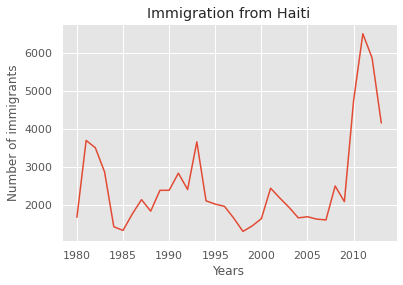

In [ ]:
# passing in years 1980 - 2013 to exclude the 'total' column
haiti = df_can.loc['Haiti', years]
# let's change the index values of Haiti to type integer for plotting
haiti.index = haiti.index.map(int)
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure

#what is you observation?

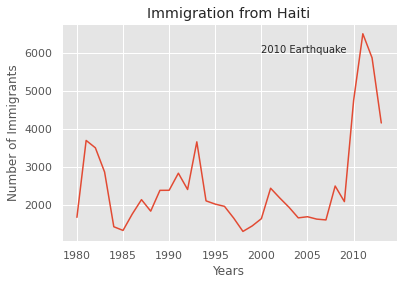

In [ ]:
#after a search we find out that in 2010 there was an earthquick and that might have cause the spike
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake.
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake') # see note below

plt.show()

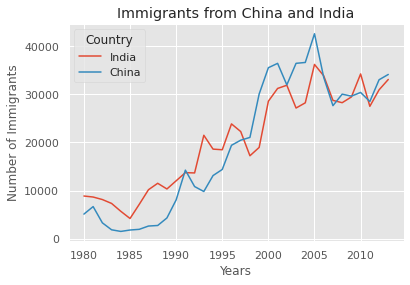

In [ ]:
#now lets compare few different countries using line graph
df_c = df_can.loc[['India','China'], years]
#change columns with rows
df_c = df_c.transpose()
#df_c.head()

#df_c.index=df_c.index.map(int)
df_c.plot(kind='line')
plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

Text(0.5, 0, 'Years')

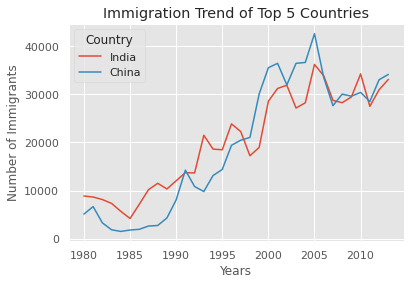

In [ ]:
#to get better control of the graphing it is best to use artistic layer by using Axes
ax = df_c.plot(kind='line')
ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

Compare the trend of top 5 countries that contributed the most to immigration to Canada.


*   a) using line plot
*   b) using area plot (you need to set alpha(transparenct) and stacked values)




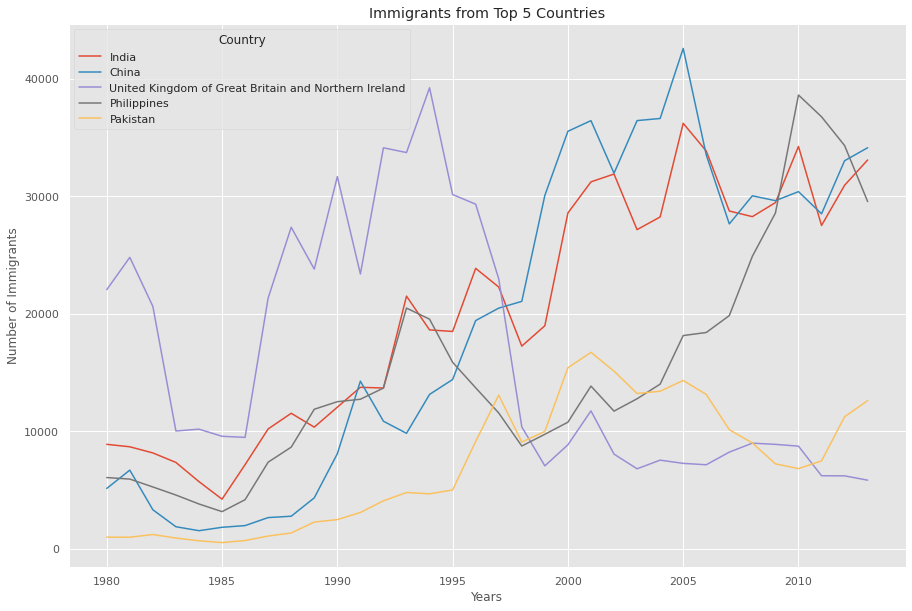

In [ ]:
# sort dataframe by total
# get top 5 rows
dfr=df_can.sort_values('Total',ascending=False).head(5)
# transpose the dataframe
dfr=dfr.drop(["Continent","Region","DevName","Total"],axis=1)
dfr=dfr.transpose()
#set the plot kind and figsize
dfr.plot(kind='line',figsize=(15,10))
# set title, x and y lable
plt.title('Immigrants from Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
#plot the graph
plt.show()

### **Histogram**


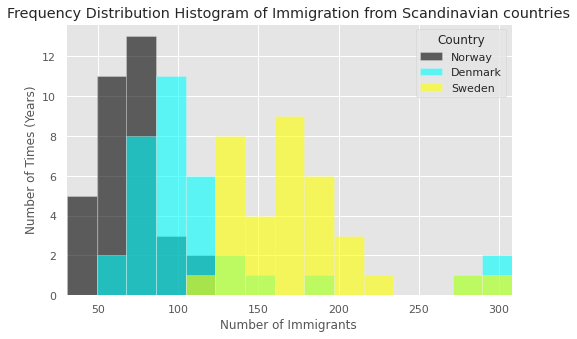

In [ ]:
dfnds = df_can.loc[['Norway','Denmark','Sweden'], years]
dfnds=dfnds.transpose()
dfnds.plot(kind='hist', figsize=(8, 5),alpha=0.6,color=( "black", "cyan", "yellow"),stacked=False,bins=15)
#stacked set True adds the frequency of the 3 countries however set False goes as the highest count of the highest frequency of 1 country

plt.title('Frequency Distribution Histogram of Immigration from Scandinavian countries') # add a title to the histogram
plt.ylabel('Number of Times (Years)') # add y-label
plt.xlabel('Number of Immigrants') # add x-label
plt.xlim([30, 308])
plt.show()

In [ ]:
import matplotlib
for name, code in matplotlib.colors.cnames.items():
  print(name,code)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


Tip:
For a full listing of colors available in Matplotlib, run the following code in your python shell:

```python
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)
```


### **Exercise 2:**
What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?
*   get the right dataset
*   use 15 bins
*   set transparency to 60% (alpha)
*   label the x-axis (x-lable)
*   change the colors (color)
*   check with stacked true and false to see the difference
*   use xlim to make it look better [optional]

### **Bar Chart**
Bar graphs usually represent numerical and categorical variables grouped in intervals.<br>
kind=bar/barh

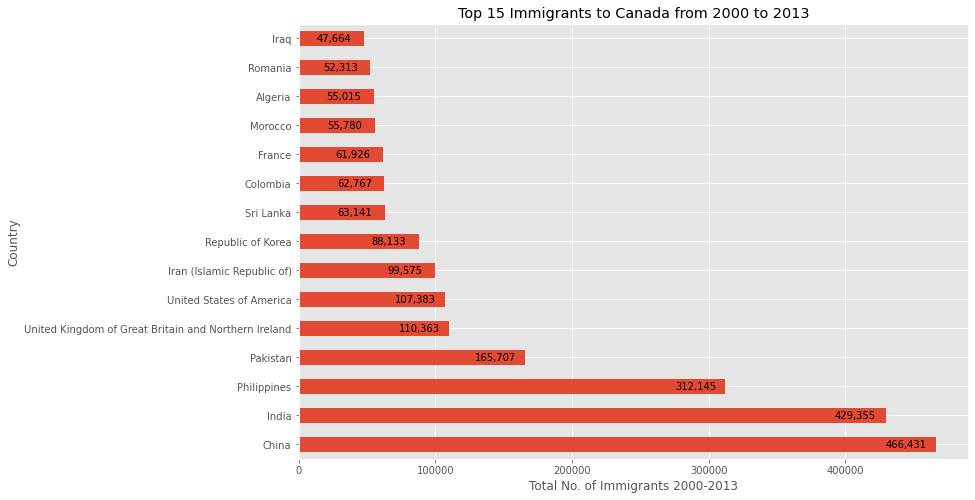

In [ ]:
#visit https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html fot annotation details

#compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.
#Iceland
dff=df_can
# transpose the dataframe
dff=dff.drop(columns=["Continent","Region","DevName","Total"],axis=1)
dff = dff.iloc[:,20:]
dff=dff.transpose()
dff.loc['total']= dff.sum()
dff=dff.transpose()
dff=dff.sort_values('total',ascending=False).head(15)
dff = dff['total']
#rotate xlables by 90 degree
ax=dff.plot(kind='barh', figsize=(12, 8))
plt.xlabel('Total No. of Immigrants 2000-2013')
plt.ylabel('Country')
plt.title('Top 15 Immigrants to Canada from 2000 to 2013')
rects = ax.patches
# Place a label for each bar
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = -30
    ha = 'center'
    label = '{:,.0f}'.format(x_value)

    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at bar end
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords='offset points', # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,                      # Horizontally align label differently for positive and negative values
        color = 'black')

plt.show()

### **Exercise 3:**
create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 2000-2013. Label each country with the total immigrant count.
[google how to add lable to bar chart]

### **Pie Charts**
show breakdown of a destribution over a variable.<br>
The process to have a nice pie chart is as below:
1.  **Split:** Splitting the data into groups based on some criteria.
2.  **Apply:** Applying a function to each group independently:
    .sum()
    .count()
    .mean()
    .std()
    .aggregate()
    .apply()
    .etc..
3.  **Combine:** Combining the results into a data structure.

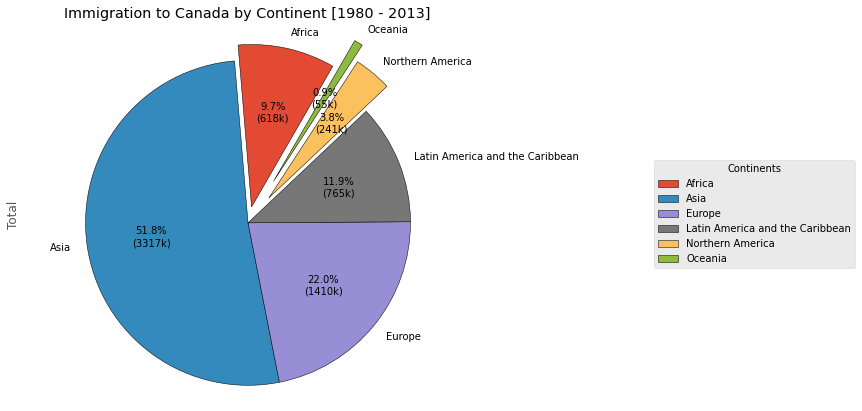

In [ ]:
# group countries by continents and apply sum() function
import numpy as np
df_continents = df_can.groupby('Continent', axis=0).sum()

def func(pct, allvalues):
    absolute = int(pct / 100000.*np.sum(allvalues))
    return "{:.1f}%\n({:d}k)".format(pct, absolute)

# autopct create %, start angle represent starting point
ax=df_continents['Total'].plot(kind='pie',
                            figsize=(8, 7),
                            autopct=lambda pct: func(pct, df_continents['Total']), # add in percentages
                            startangle=60,
                            explode=(0.1, 0.0, 0.0, 0.0,0.2,0.3),
                            wedgeprops = { 'linewidth' : 0.5, 'edgecolor' : "black" },     # start angle 90° (Africa)
                            shadow=False,
                            textprops = dict(color ="black"))

ax.legend(
          title ="Continents",
          loc ="center left",
          bbox_to_anchor =(1.4, 0, 0.5, 1))
plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

### **Exercise 4:**
customize the above chart as you wish based on instruction in
[advanced pie chart](https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/) or any other tutorials you want. just make it look professional.


### **Box Plot:**

Shows destribution of data over 5 main categories<br>
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/boxplot_complete.png" width=440, align="left">

### **Exercise 5:**

* Using heart disease dataset, create box plot for all variables and identify ourliers if there are any.
* Customize the plot by adding colour and legend. it should look similar to below box plot<br>
<img src="https://www.pythonpool.com/wp-content/uploads/2021/02/Matplotlib-boxplot-with-legend.png" width=440, align="left">

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

pd.set_option("display.max.columns", None)
file_path="/content/heart.csv"
df=pd.read_csv(file_path)
df['HeartDisease'] = df['HeartDisease'].astype(bool)
df['FastingBS'] = df['FastingBS'].astype(bool)
display(df.head(1))

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,False,Normal,172,N,0.0,Up,False


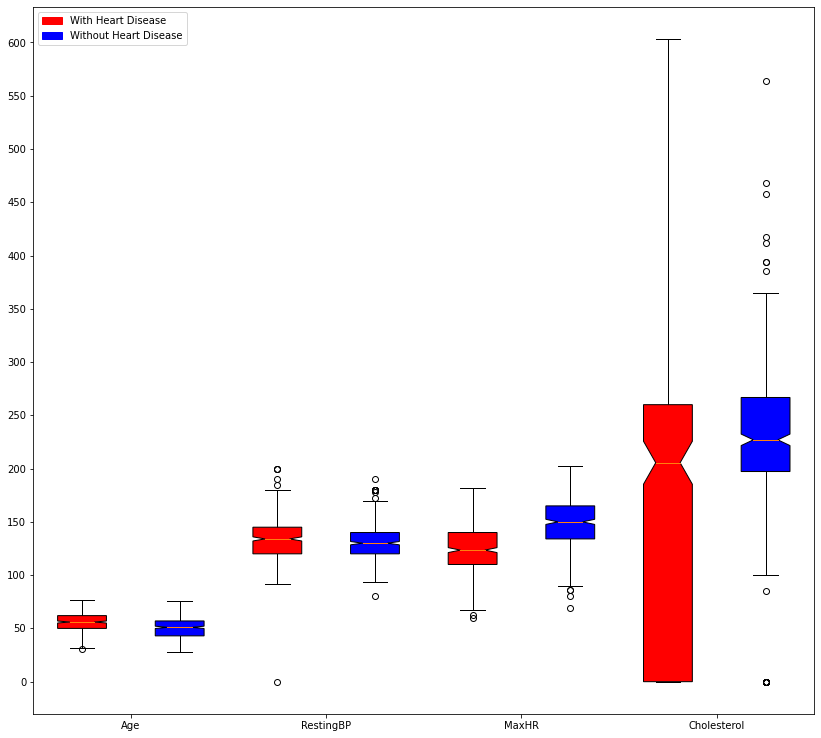

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches

ageHD=[]
ageF=[]
RestingBPHD=[]
RestingBPF=[]
CholesterolHD=[]
CholesterolF=[]
MaxHRHD=[]
MaxHRF=[]

for ind in df.index:
    if((df['HeartDisease'][ind])==True):
      ageHD=np.append(ageHD, df['Age'][ind])
      RestingBPHD=np.append(RestingBPHD, df['RestingBP'][ind])
      CholesterolHD=np.append(CholesterolHD, df['Cholesterol'][ind])
      MaxHRHD=np.append(MaxHRHD, df['MaxHR'][ind])
    else:
      ageF=np.append(ageF, df['Age'][ind])
      RestingBPF=np.append(RestingBPF, df['RestingBP'][ind])
      CholesterolF=np.append(CholesterolF, df['Cholesterol'][ind])
      MaxHRF=np.append(MaxHRF, df['MaxHR'][ind])

data = list(zip(ageHD, ageF,RestingBPHD, RestingBPF,MaxHRHD, MaxHRF,CholesterolHD, CholesterolF))
dfh=pd.DataFrame(data,columns=['Age With HD','Age W/o HD','RestingBP With HD','RestingBP W/o HD','MaxHR With HD','MaxHR W/o HD','Cholesterol With HD','Cholesterol W/o HD'])
dfh=dfh.transpose()

fig, ax = plt.subplots(figsize=(14,13))

bplot=ax.boxplot(dfh,notch=True,patch_artist=True)
colors=['red','blue','red','blue','red','blue','red','blue']
for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

plt.xticks([1.5, 3.5, 5.5,7.5], ["Age","RestingBP","MaxHR","Cholesterol"])
plt.yticks([0,50,100,150,200,250,300,350,400,450,500,550,600])

red_patch = mpatches.Patch(color='red', label='With Heart Disease')
blue_patch=mpatches.Patch(color='blue', label='Without Heart Disease')
plt.legend(handles=[red_patch,blue_patch])
plt.show()


### **Scatter Plots and subplots**
used to find correlation between 2 variables<br>
**Subplot:** devide the figure into subplots<br>
> fig = plt.figure() # create figure<br>
> ax = fig.add_subplot(nrows, ncols, plot_number)

### **Exercise 6:**
Choose a variable (e.g BP, HR,etc..). Use subplot and scatter plot to visualize correlation between this variable and each of the other variables in the set.<br>
make sure to draw the regression line for each plot.<br>
for this exercise use seaborn, you can follow this [instruction](https://https://www.geeksforgeeks.org/scatterplot-using-seaborn-in-python/) for help.

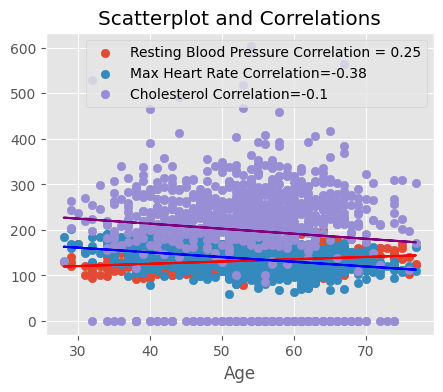

In [ ]:
import numpy as np
x=df['Age']
y=df['RestingBP']
y1=df['MaxHR']
y2=df['Cholesterol']
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(df['Age'], df['RestingBP'], label=f'Resting Blood Pressure Correlation = {np.round(np.corrcoef(x,y)[0,1], 2)}')
plt.scatter(df['Age'], df['MaxHR'], label=f'Max Heart Rate Correlation={np.round(np.corrcoef(x,y1)[0,1], 2)}')
plt.scatter(df['Age'], df['Cholesterol'], label=f'Cholesterol Correlation={np.round(np.corrcoef(x,y2)[0,1], 2)}')
plt.xlabel("Age")
plt.title('Scatterplot and Correlations')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b,color="red")
z, f = np.polyfit(x, y1, 1)
plt.plot(x, z*x+f,color="blue")
s, y = np.polyfit(x, y2, 1)
plt.plot(x, s*x+y,color="purple")
plt.legend()
plt.show()

### **Exercise 7:**
Using the same dataset (Canada Migration) or any other data from [International Migration Dataset](https://stats.oecd.org/Index.aspx?DataSetCode=MIG#) Use Seaborn Library to create at least three of the graphs below to answer three different questions<br>
[instruction](https://www.analyticsvidhya.com/blog/2021/02/an-intuitive-guide-to-visualization-in-python/)
*   100% stacked bar chart
*   Grouped bar chart
*   Bubble chart
*   Venn diagram
*   Tree map
*   Marginal plots





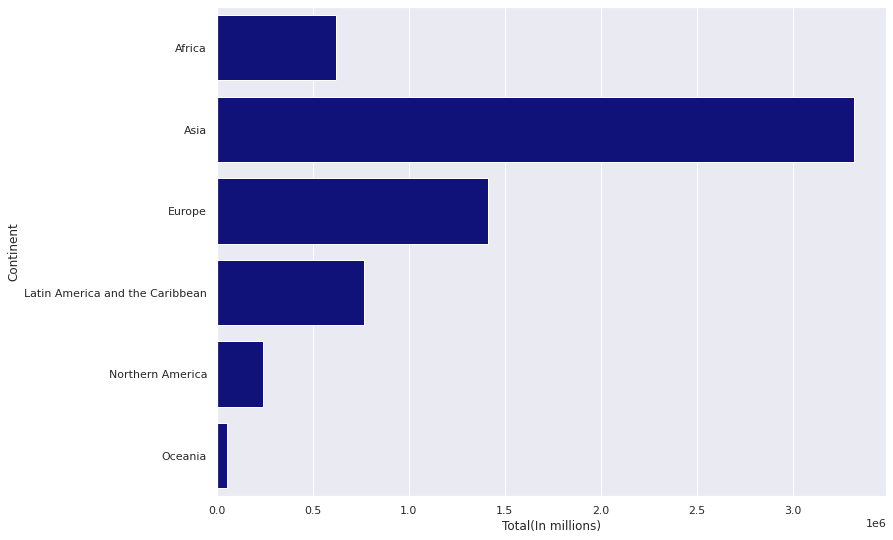

In [ ]:
#grouped bar chart to show total immigration by continent
import seaborn as sns
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

sns.set(style="darkgrid")

plt.figure(figsize=(12, 9))

total = df_can.groupby('Continent')['Total'].sum().reset_index()

bar1 = sns.barplot(x='Total',y='Continent',data=total, color='darkblue')
plt.xlabel('Total (In Millions)')
# show the graph
plt.show()


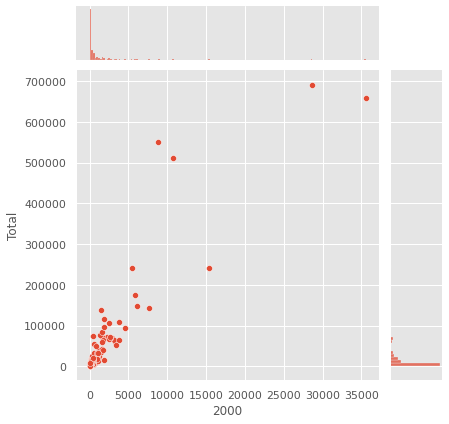

In [ ]:
fig=sns.jointplot(x=df_can['2000'],y='Total',data=df_can,kind='scatter')

plt.show(fig)


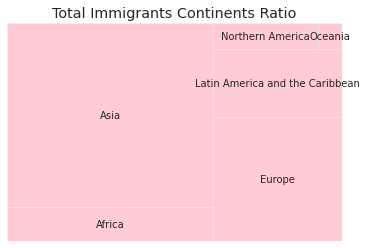

In [ ]:
import squarify
import numpy as np

df_grouped = df_can.groupby(['Continent'], axis=0).sum().reset_index()

# Plot the tree map
squarify.plot(sizes=df_grouped['Total'], label=df_grouped['Continent'], color='pink', alpha=.8)

# Add labels
plt.title("Total Immigrants Continents Ratio")
plt.axis('off')

# Show the plot
plt.show()


### **WordCloud**
shows destribution of textual data

(-0.5, 399.5, 199.5, -0.5)

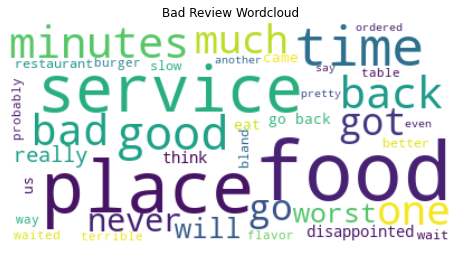

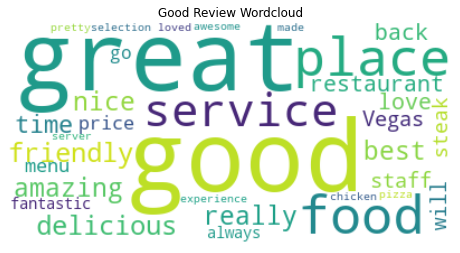

In [ ]:
#!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
goodreviews=[]
badreviews=[]
rr=pd.read_table('/content/Restaurant_Reviews.tsv')
for ind in rr.index:
    if((rr['Liked'][ind])==1):
      goodreviews=np.append(goodreviews, rr['Review'][ind])
    else:
      badreviews=np.append(badreviews, rr['Review'][ind])

stopwords = set(STOPWORDS)
text=" ".join(badreviews)
text1=" ".join(goodreviews)

wordcloud=WordCloud(background_color ='white',stopwords = stopwords,
                    min_font_size = 10,max_words=50).generate(text)

wordcloud1=WordCloud(background_color ='white',stopwords = stopwords,
                    min_font_size = 10,max_words=50).generate(text1)

# store to file
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Bad Review Wordcloud')
plt.axis("off")

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.title('Good Review Wordcloud')
plt.axis("off")


### **Exercise 8:**
*   load the restaurant review dataset.
*   using top 50 words
> create a word cloud for negative reviews<br>
> create the word cloud for positive reviews




## **Maps**
---


In [ ]:
#!pip install folium==0.5.0
import folium
# define the world map
world_map = folium.Map()

# display world map
world_map

In [ ]:
# define the world map centered around Canada with a low zoom level
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4)

# display world map
world_map

In [ ]:
#showing UAE Map
#check out different map tiles
#https://deparkes.co.uk/2016/06/10/folium-map-tiles/
world_map = folium.Map(location=[23.4241, 53.8478], zoom_start=6,tiles='Stamen Toner')
world_map

In [ ]:
import pandas as pd
import folium

uae_map = folium.Map(location=[23.4241, 53.8478], zoom_start=7)

data={
      'city':['Dubai','Sharjah','Abu Dhabi','Al Ayn','Ajman','Ras al Khaymah','Al Fujayrah','Umm al Qaywayn'],
      'latitude':[25.2697,25.3575,24.4781,24.2075,25.3994,25.7915,25.1308,25.5653],
      'longitude':[55.3094,55.3919,54.3686,55.7447,55.4797,55.9428,56.3347,55.5533],
      'population':[2502715,1400000,1000000,766936,238119,115949,93673,32651]
      }

uae = pd.DataFrame(data)

folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/deldersveld/topojson/master/countries/united-arab-emirates/united-arab-emirates.json',
    name='choropleth',
    data=uae,
    columns=['city', 'population'],
    key_on='feature.properties.city',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Population of UAE Cities'
).add_to(uae_map)

# Display the map
uae_map



AttributeError: ignored

### **Exercise 9:**
using Folium create Choropleth Maps of UAE population<br>
**or**<br>
using boston crime dataset. change above map to show total crime per destrict on boston map

In [ ]:
!pip install pixiedust
import pixiedust
import pandas as pd
crime = pixiedust.sampleData(7)
dfc = pd.DataFrame(crime)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Creating pandas DataFrame for 'Boston Crime data, 2-week sample'. Please wait...
Loading file using 'pandas'
Successfully created pandas DataFrame for 'Boston Crime data, 2-week sample'
Creating pandas DataFrame for 'Boston Crime data, 2-week sample'. Please wait...
Loading file using 'pandas'
Successfully created pandas DataFrame for 'Boston Crime data, 2-week sample'


In [ ]:
display(dfc)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
## Create a folium map centered on Boston
m = folium.Map(location=[42.3601, -71.0589], zoom_start=12)

# Group the data by district and calculate the sum of crimes in each district
grouped = df.groupby("DISTRICT").sum().reset_index()

# Add a choropleth layer to the map
folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/python-visualization/folium/master/examples/data',
    name='choropleth',
    data=grouped,
    columns=['DISTRICT', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Crime Rate in Boston Districts'
).add_to(m)

# Display the map
m

KeyError: ignored

##**Interactive Dashboard**

---



In [ ]:
! pip install jupyter_dash
! pip install --upgrade plotly

import dash
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
from dash.dependencies import Input, Output

In [ ]:
! wget https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

In [ ]:
import pandas as pd
df = pd.read_csv("time_series_covid19_confirmed_global.csv")
df = df.groupby(['Country/Region'], as_index=False).sum()
df.drop(["Lat","Long"], axis=1,inplace=True)
df = df.T
df.columns =  df.iloc[0]
df = df[1:]
df.reset_index(inplace=True)
df.rename(columns={'index': 'date'},inplace=True)
df

In [ ]:
px.line(df, x="date", y="Japan")

In [ ]:
app = JupyterDash(__name__)

app.layout = html.Div([
  dcc.Dropdown(id="my_dropdown",
    options=[{"value": country, "label": country} for country in df.columns.unique()],
    value=["Japan"],
    multi=True
    ),
  dcc.Graph(id="my_graph")
])

@app.callback(Output("my_graph", "figure"), Input("my_dropdown", "value"))
def update_graph(selected_country):
  return px.line(df, x="date", y=selected_country)

app.run_server(mode="inline")